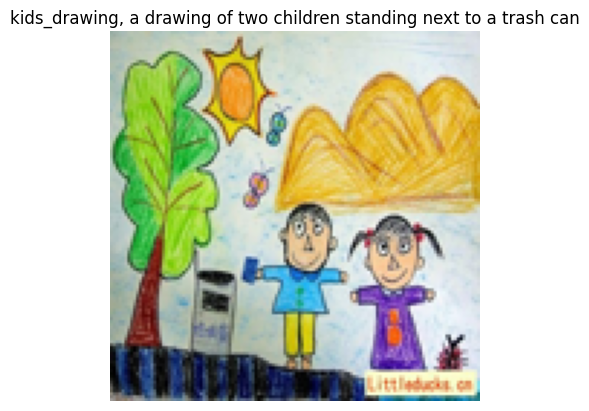

In [14]:
import torch
import matplotlib.pyplot as plt
from model.training import CustomDataset
from model.diffusionModel import DiffusionModel

dataset_name = 'humanart_kids_drawing_128'
dataset = CustomDataset('./dataset/'+dataset_name+'.npy')
df = DiffusionModel(500, 64)
idx = 11

plt.figure()
plt.axis('off')
img, curr_label = dataset[int(idx)]
img = df.unorm(img)
plt.title(curr_label)
plt.imshow(img.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor([[[nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         ...,
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan]],

        [[nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         ...,
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan]],

        [[nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         ...,
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan]]], device='cuda:0')
Imagenes generadas


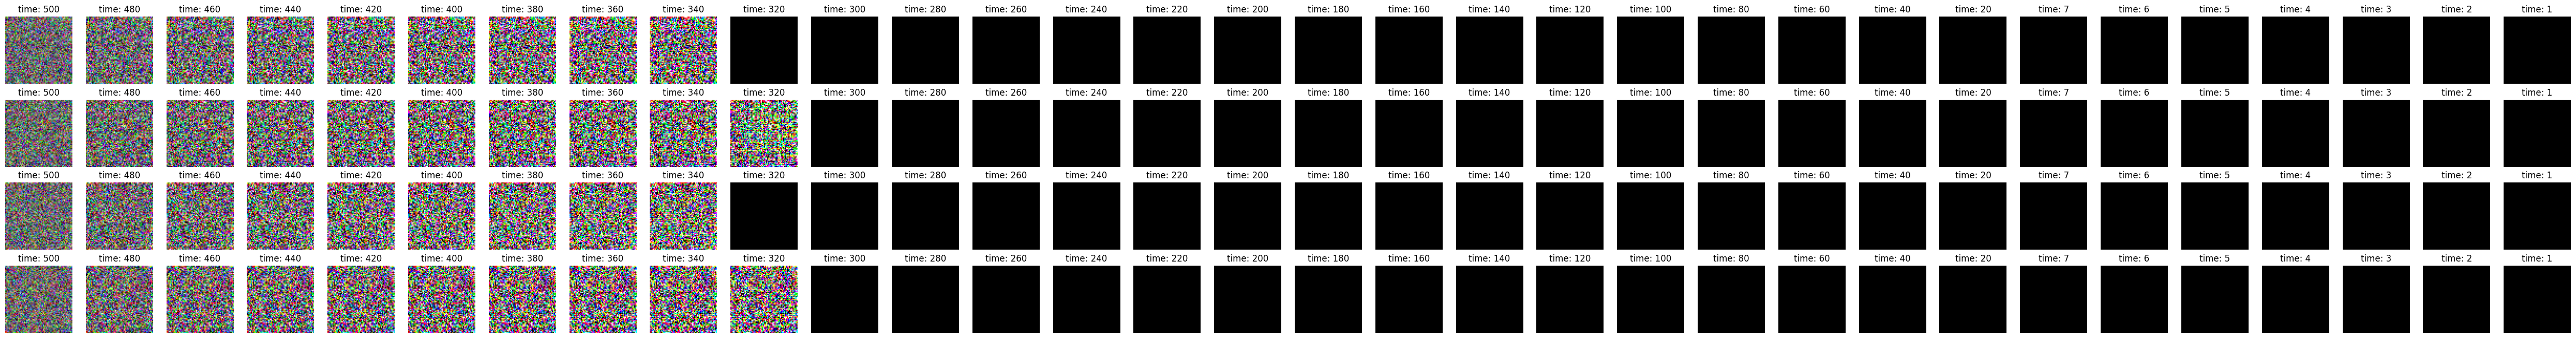

In [9]:
from model.diffusionModel import DiffusionModel
from model.unet import Unet
import matplotlib.pyplot as plt
import torch


# network hyperparameters
batch_size = 4
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
n_feat = 512 # hidden dimension feature
max_text_len = 64 # word vector
height = 64 # 64x64 image
save_dir = './weights_humanart_kids_drawing/'
# diffusion hyperparameters
timesteps = 20000

df = DiffusionModel(timesteps, height)
model = Unet(in_channels=3, n_feat=n_feat, max_text_len=max_text_len, height=height, device=device).to(device)
model.load_state_dict(torch.load(save_dir+"model_3900.pth", map_location=device))

model.eval()
#model.train()

a = ('kids_drawing, a cartoon girl singing into a microphone',
     'kids_drawing, a cartoon girl singing into a microphone',
     'kids_drawing, a cartoon girl singing into a microphone',
     'kids_drawing, a cartoon girl singing into a microphone')

samples = df.sample_ddpm_context(model, 4, a,save_rate=800)
df.draw_samples_process(path='./generated_images/')
print(samples[0])
"""
samples = samples.detach().cpu().numpy()
for i, img in enumerate(samples):
    plt.subplot(1, 4, i + 1)
    plt.axis('off')
    img = df.unorm(img)
    plt.imshow(img.permute(1,2,0))
"""

print('Imagenes generadas')

In [4]:
0.1*0.8

0.08000000000000002